In [6]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

In [7]:
df = pd.read_csv('placement-dataset.csv')
df.head(3)

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0


In [8]:
# Dropping the 'Unnamed: 0' column

df = df.drop(columns=['Unnamed: 0'])

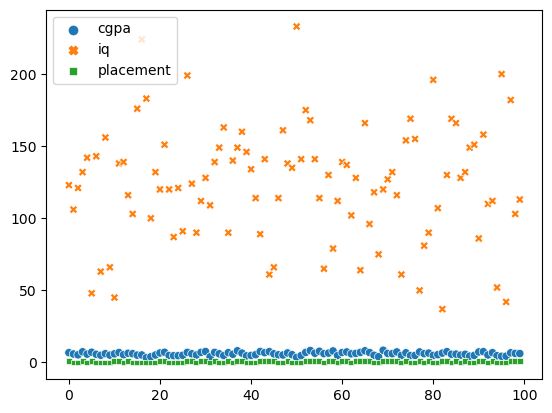

In [9]:
sns.scatterplot(data = df)
plt.show()

In [11]:
X = df.drop('placement', axis=1)
y = df['placement'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# For classification

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [13]:
# Make predictions

y_pred = clf.predict(X_test)

# Evaluate the model

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.93


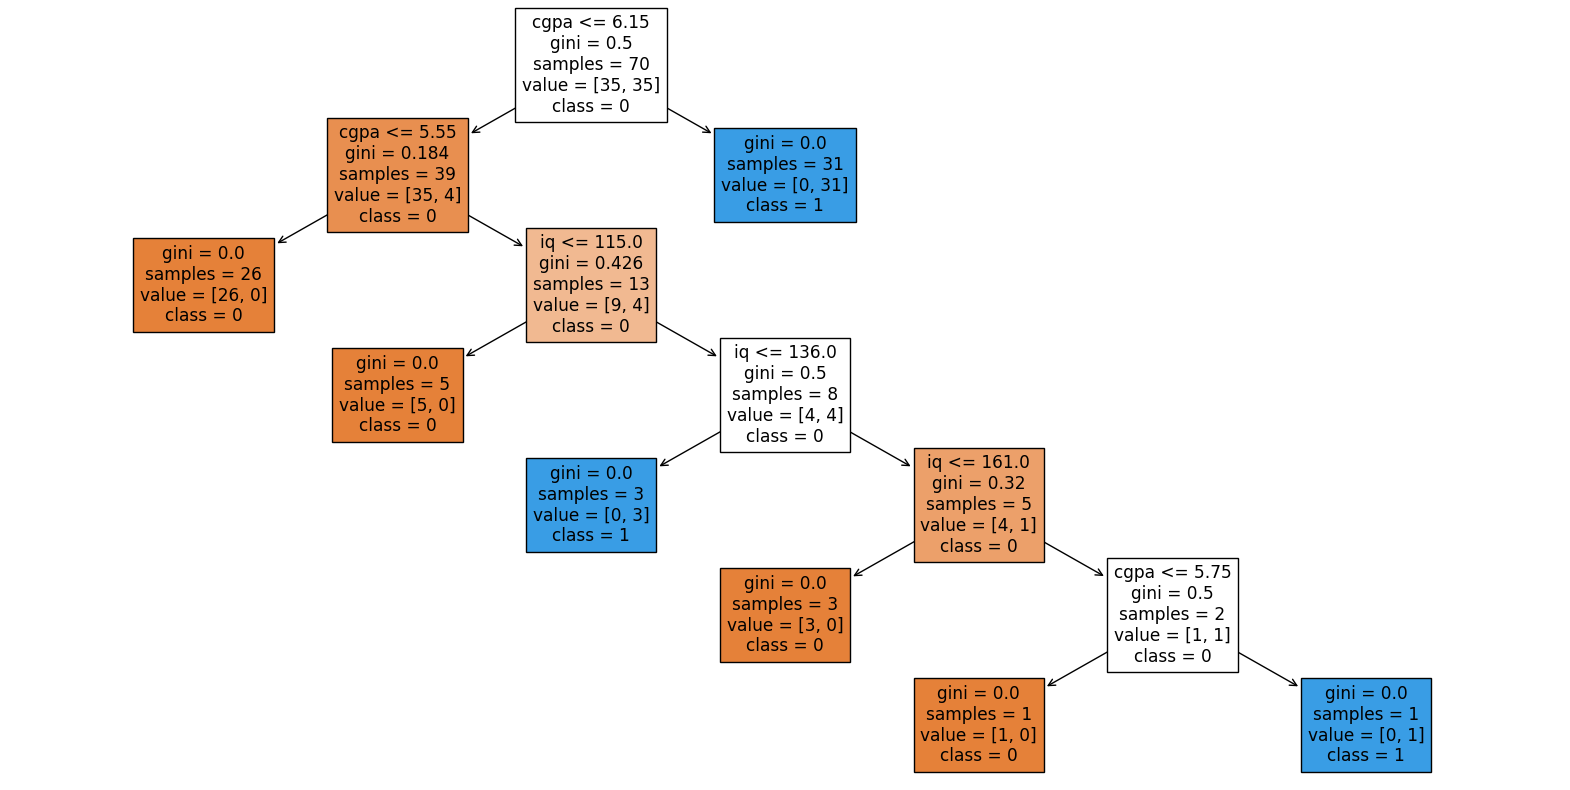

In [14]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=np.unique(y).astype(str))
plt.show()

C:\Users\Muneeza\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


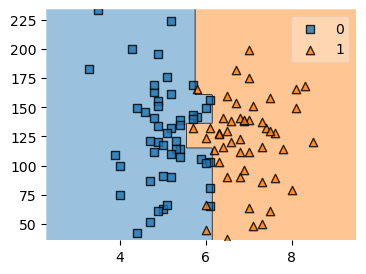

In [15]:
plt.figure(figsize=(4,3))

plot_decision_regions(X.to_numpy(),y.to_numpy(),clf = clf)
plt.show()

# Overfitting checking

In [18]:
clf.score(X_train,y_train)*100

100.0

In [19]:
clf.score(X_test,y_test)*100

93.33333333333333

# Pre Pruning

In [73]:
clf_pre = DecisionTreeClassifier(max_depth = 7)
clf_pre.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [74]:
y_pred = clf_pre.predict(X_test)

In [75]:
clf_pre.score(X_train,y_train)*100

100.0

In [76]:
clf_pre.score(X_test,y_test)*100

93.33333333333333

# Post Pruning

In [88]:
for i in range(1,20):
    dt = DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    print(dt.score(X_train,y_train)*100,dt.score(X_test,y_test)*100,i)

94.28571428571428 93.33333333333333 1
94.28571428571428 93.33333333333333 2
94.28571428571428 93.33333333333333 3
98.57142857142858 93.33333333333333 4
98.57142857142858 93.33333333333333 5
100.0 93.33333333333333 6
100.0 93.33333333333333 7
100.0 93.33333333333333 8
100.0 93.33333333333333 9
100.0 93.33333333333333 10
100.0 90.0 11
100.0 93.33333333333333 12
100.0 93.33333333333333 13
100.0 90.0 14
100.0 90.0 15
100.0 93.33333333333333 16
100.0 93.33333333333333 17
100.0 93.33333333333333 18
100.0 93.33333333333333 19
